In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Cargar el archivo CSV depurado desde la ruta correcta
file_path = '/Users/issacmoto/Desktop/Tripletent/Proyectos Tripletent/Myprojectvideogames/videogames/videogames_cleaned.csv'
df = pd.read_csv(file_path)

# Verificar que los datos se hayan cargado correctamente
print(df.head())

                       name  year_of_release         genre  na_sales  \
0                Wii Sports             2006        Sports  1.000000   
1         Super Mario Bros.             1985      Platform  0.703095   
2            Mario Kart Wii             2008        Racing  0.379110   
3         Wii Sports Resort             2009        Sports  0.377418   
4  Pokemon Red/Pokemon Blue             1996  Role-Playing  0.272485   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  ...  \
0  1.000000  0.368885     0.799432          76.0         8.0      E  ...   
1  0.123619  0.666341     0.072848          71.0         7.5      E  ...   
2  0.440608  0.370841     0.311258          82.0         8.3      E  ...   
3  0.377417  0.320939     0.279092          80.0         8.0      E  ...   
4  0.306975  1.000000     0.094607          71.0         7.5      E  ...   

   platform_SCD  platform_SNES  platform_TG16  platform_WS  platform_Wii  \
0         False          False    

1. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
year_of_release: Originalmente, esta columna estaba en formato float64, lo cual no es apropiado para representar años. Decidimos convertirla a Int64 porque los años deben representarse como enteros. Además, el tipo Int64 permite manejar valores faltantes (NaN), lo que fue útil antes de la imputación de los valores ausentes.

user_score: Esta columna estaba en formato object, probablemente porque contenía tanto números como el valor "tbd" (to be determined). Convertimos la columna a float64 después de reemplazar "tbd" con NaN, lo cual permitió tratar los valores como puntuaciones numéricas para análisis posteriores.

2. Si es necesario, elige la manera de tratar los valores ausentes.
Columna name y genre: Decidimos eliminar las filas que contenían valores ausentes en estas columnas porque estas son características clave para cada videojuego. No tendría sentido analizar o hacer cálculos sobre juegos sin nombre o género.

Columnas critic_score y user_score: Imputamos los valores ausentes utilizando la mediana. La mediana es una elección robusta cuando hay valores extremos en los datos, ya que no se ve afectada por outliers, a diferencia de la media. De este modo, evitamos eliminar una gran cantidad de datos faltantes que podrían ser importantes para el análisis.

Columna rating: Los valores ausentes en esta columna fueron imputados con el valor más frecuente (la moda). La razón de esta decisión es que las clasificaciones ESRB siguen un patrón claro y utilizar el valor más común es una forma razonable de llenar los datos faltantes sin sesgar demasiado el análisis.

3. Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
Eliminación de filas en name y genre: No hay una manera intuitiva de imputar nombres o géneros de juegos faltantes sin hacer suposiciones arbitrarias, por lo que optamos por eliminar esas filas para no comprometer la calidad del análisis.

Imputación de la mediana en critic_score y user_score: Elegimos la mediana porque, en general, es una opción más segura en el caso de datos numéricos con posibles outliers, como es el caso de las puntuaciones. La imputación de la media podría haber sesgado el análisis si hubiera habido puntuaciones extremadamente altas o bajas.

Imputación de la moda en rating: Dado que la clasificación ESRB tiene un conjunto limitado de categorías (por ejemplo, "E", "T", "M"), la imputación de la moda es una elección sensata. Además, en muchos casos, la mayoría de los juegos comparten una clasificación común, por lo que este enfoque minimiza el riesgo de error.

4. ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
user_score y critic_score: Los valores ausentes en estas columnas podrían deberse a que algunos juegos no recibieron suficientes reseñas de usuarios o críticos en el momento de la recopilación de los datos. Es común que los juegos menos populares o más recientes carezcan de suficientes reseñas para generar una puntuación confiable.

rating: Los valores ausentes en la clasificación ESRB podrían ser debido a que algunos juegos, especialmente aquellos lanzados en plataformas menores o en mercados más pequeños, no fueron evaluados por el sistema ESRB.

5. Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Manejo de "tbd" en user_score: Decidimos reemplazar los valores "tbd" con NaN (valores nulos) porque "tbd" indica que la puntuación aún no estaba disponible en el momento de la recopilación de los datos. Después de convertir estos valores a NaN, imputamos los valores ausentes con la mediana, siguiendo un enfoque similar al que usamos para los otros valores ausentes en la columna.


Paso 3. Analiza los datos
#Aqui comienzo con el analisis de los datos ya depurados de "videogames.py"

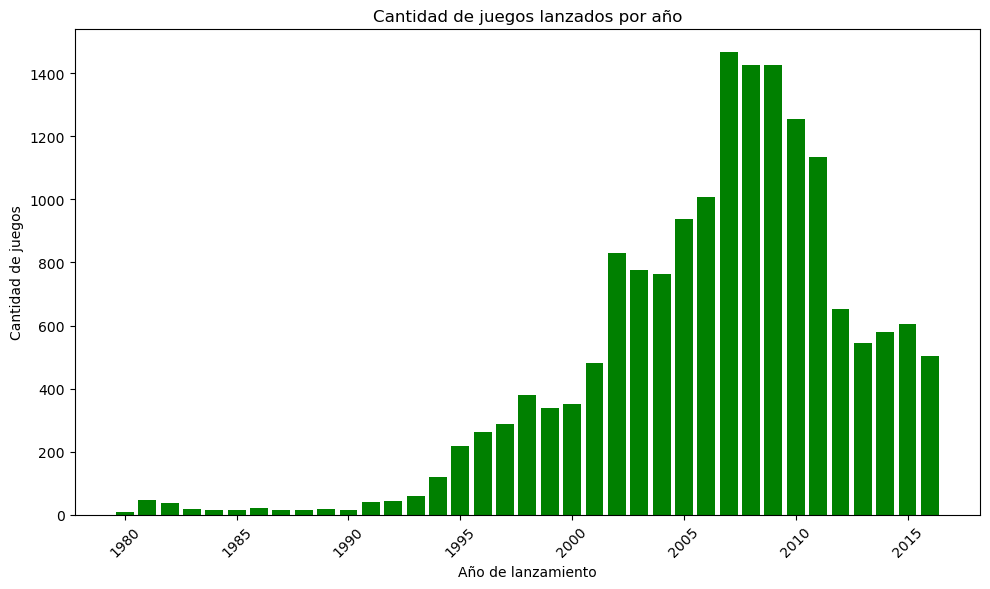

In [54]:
# Contar cuántos juegos fueron lanzados por año
#games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar los datos
#print(games_per_year)

# Contar cuántos juegos fueron lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Graficar la cantidad de juegos lanzados por año
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values, color='green')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


¿Son significativos los datos de cada período?



Períodos anteriores a 1995: No son muy significativos en términos de volumen de datos, por lo que las conclusiones basadas en estos años pueden no ser representativas.
1995-2010: Es el período más significativo en términos de cantidad de datos, y es donde se puede realizar el análisis más representativo.
Después de 2010: Aunque sigue habiendo muchos lanzamientos, el contexto cambia, y deberíamos considerar que muchas plataformas digitales no están incluidas.
En resumen, los datos de los años anteriores a 1995 pueden no ser tan significativos para análisis comparativos debido al bajo número de lanzamientos. El período entre 1995 y 2010 es el más representativo, mientras que los años posteriores requieren un análisis contextual (plataformas digitales, cambios en el modelo de negocio de los videojuegos).

Paso 1: Calcular ventas totales por plataforma

In [55]:
# Seleccionar las columnas de plataformas
platform_columns = [col for col in df.columns if col.startswith('platform_')]

# Calcular las ventas totales por plataforma
platform_sales = {}
for platform in platform_columns:
    platform_sales[platform] = (df[platform] * df['total_sales']).sum()

# Convertir los resultados en un DataFrame para visualizar mejor
platform_sales_df = pd.DataFrame(list(platform_sales.items()), columns=['platform', 'total_sales']).sort_values(by='total_sales', ascending=False)

# Mostrar las plataformas con mayores ventas totales
print("Plataformas con mayores ventas totales:")
print(platform_sales_df.head(10))


Plataformas con mayores ventas totales:
         platform  total_sales
15   platform_PS2    57.753073
16   platform_PS3    41.601532
3     platform_DS    38.553587
25   platform_Wii    35.332599
27  platform_X360    33.245708
14    platform_PS    33.063805
18   platform_PSP    16.373351
1    platform_3DS    15.255793
10   platform_NES    13.930296
22  platform_SNES    13.846620


Paso 2: Comparar la evolución de las ventas por año en las plataformas más populares

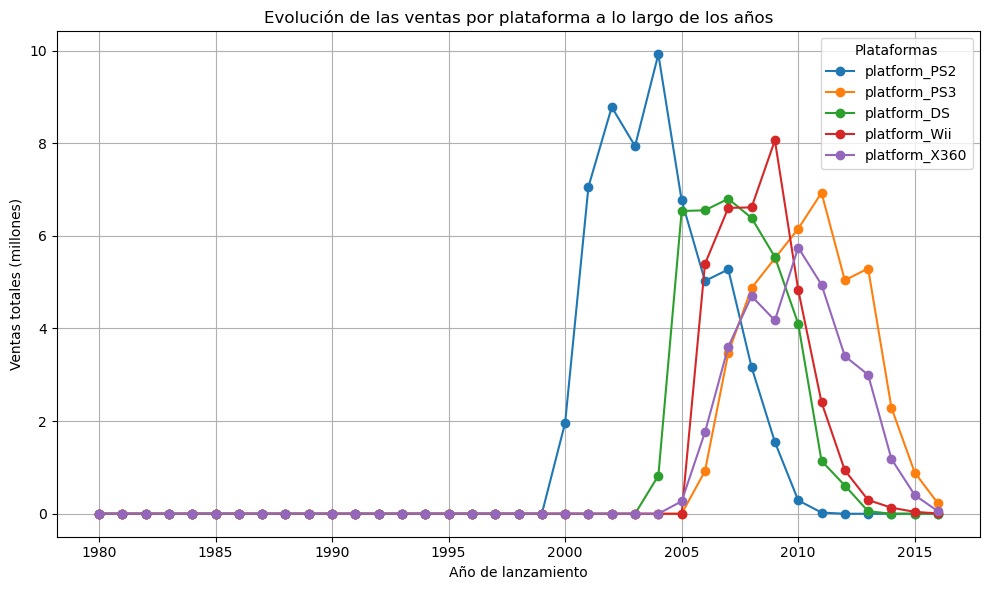

In [56]:


# Seleccionar las plataformas más populares (las primeras 5 por ejemplo)
top_platforms = platform_sales_df.head(5)['platform']

# Crear una lista de las columnas de las plataformas más populares
top_platform_columns = top_platforms.tolist()

# Filtrar los datos para las plataformas más populares
filtered_df = df[['year_of_release', 'total_sales'] + top_platform_columns]

# Crear un DataFrame que sume las ventas por año para cada plataforma
platform_sales_per_year = {}
for platform in top_platform_columns:
    platform_sales_per_year[platform] = filtered_df.groupby('year_of_release')[[platform, 'total_sales']].apply(
        lambda x: (x[platform] * x['total_sales']).sum())

# Convertir los resultados en un DataFrame
platform_sales_per_year_df = pd.DataFrame(platform_sales_per_year)

# Graficar la evolución de las ventas por plataforma y año
platform_sales_per_year_df.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Evolución de las ventas por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusiones sobre las plataformas que solían ser populares pero ya no tienen ventas:

PlayStation 2 (PS2) y Nintendo DS (DS): Ambas consolas fueron extremadamente populares, pero ya no tienen ventas después de 2010. Esto puede deberse al avance hacia nuevas generaciones de consolas y plataformas digitales.
Nintendo Wii: Aunque fue un fenómeno en su momento, sus ventas han disminuido drásticamente después de 2010, y la plataforma ya no tiene ventas actuales.


Observaciones clave:

PlayStation 2 (PS2):

Fue una de las plataformas más populares en términos de ventas totales. Las ventas aumentaron rápidamente a principios de los 2000, alcanzando su punto máximo alrededor de 2005, y luego disminuyeron gradualmente.

Nintendo DS (DS):

La DS tuvo un gran crecimiento a partir de 2005 y se mantuvo con ventas fuertes durante varios años, antes de una caída rápida alrededor de 2010.

Nintendo Wii:

Tuvo un gran éxito entre 2006 y 2010, con un claro pico de ventas alrededor de 2008. A partir de ahí, las ventas disminuyeron rápidamente.

PlayStation 3 (PS3) y Xbox 360 (X360):

Ambas consolas tuvieron ventas similares, creciendo rápidamente a partir de 2006 y alcanzando su punto máximo alrededor de 2010. Luego, las ventas de ambas plataformas disminuyeron a medida que surgieron nuevas generaciones de consolas.


Paso 3: Buscar plataformas que solían ser populares pero que ahora no tienen ventas

In [57]:
# Encontrar las columnas de plataformas
platform_columns = [col for col in df.columns if col.startswith('platform_')]

# Crear un DataFrame para almacenar el último año de ventas para cada plataforma
last_year_sales = {}

# Iterar sobre cada columna de plataforma y encontrar el último año con ventas
for platform in platform_columns:
    # Filtrar las ventas solo para la plataforma actual
    platform_data = df[df[platform] == 1]
    
    # Verificar el último año con ventas (si la plataforma tiene datos)
    if not platform_data.empty:
        last_year = platform_data['year_of_release'].max()
        total_sales = platform_data['total_sales'].sum()
        last_year_sales[platform] = {'last_year': last_year, 'total_sales': total_sales}

# Convertir el diccionario en un DataFrame
last_year_sales_df = pd.DataFrame(last_year_sales).T  # .T para transponer el DataFrame

# Ordenar por el último año de ventas
last_year_sales_df = last_year_sales_df.sort_values(by='last_year')

# Mostrar las plataformas que no tienen ventas recientes (por ejemplo, ventas antes de 2015)
platforms_no_recent_sales = last_year_sales_df[last_year_sales_df['last_year'] < 2015]
print("Plataformas que ya no tienen ventas recientes:")
print(platforms_no_recent_sales)


Plataformas que ya no tienen ventas recientes:
               last_year  total_sales
platform_GG       1992.0     0.003914
platform_SCD      1994.0     0.085371
platform_GEN      1994.0     1.001970
platform_NES      1994.0    13.930296
platform_3DO      1995.0     0.009785
platform_TG16     1995.0     0.015656
platform_PCFX     1996.0     0.002935
platform_NG       1996.0     0.140900
platform_SNES     1999.0    13.846620
platform_SAT      1999.0     3.199233
platform_WS       2001.0     0.138943
platform_PS       2007.0    33.063805
platform_GBA      2007.0    12.495175
platform_GC       2007.0     7.165073
platform_N64      2007.0     8.541753
platform_GB       2007.0    13.519814
platform_XB       2008.0     7.578414
platform_DC       2008.0     1.052760
platform_PS2      2011.0    57.753073
platform_DS       2013.0    38.553587


Conclusión:
Muchas de estas plataformas fueron extremadamente populares en su tiempo, pero han sido reemplazadas por generaciones más recientes de consolas. Este análisis muestra claramente cómo algunas plataformas fueron dominantes durante ciertos períodos, pero con el tiempo han quedado obsoletas.

Paso 4: ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [58]:
# Encontrar el primer y el último año con ventas para cada plataforma
platform_lifetime = {}

# Iterar sobre cada columna de plataforma y encontrar el primer y último año con ventas
for platform in platform_columns:
    platform_data = df[df[platform] == 1]
    
    if not platform_data.empty:
        first_year = platform_data['year_of_release'].min()  # Primer año con ventas
        last_year = platform_data['year_of_release'].max()   # Último año con ventas
        total_sales = platform_data['total_sales'].sum()
        platform_lifetime[platform] = {
            'first_year': first_year,
            'last_year': last_year,
            'lifetime': last_year - first_year,
            'total_sales': total_sales
        }

# Convertir a DataFrame
platform_lifetime_df = pd.DataFrame(platform_lifetime).T

# Ordenar por el ciclo de vida (tiempo activo)
platform_lifetime_df = platform_lifetime_df.sort_values(by='lifetime', ascending=False)

# Mostrar el ciclo de vida de las plataformas
print("Ciclo de vida de las plataformas (en años):")
print(platform_lifetime_df[['first_year', 'last_year', 'lifetime', 'total_sales']])


Ciclo de vida de las plataformas (en años):
               first_year  last_year  lifetime  total_sales
platform_PC        1985.0     2016.0      31.0     9.337997
platform_DS        1985.0     2013.0      28.0    38.553587
platform_GB        1988.0     2007.0      19.0    13.519814
platform_PS        1994.0     2007.0      13.0    33.063805
platform_PS2       2000.0     2011.0      11.0    57.753073
platform_N64       1996.0     2007.0      11.0     8.541753
platform_PSP       2004.0     2015.0      11.0    16.373351
platform_X360      2005.0     2016.0      11.0    33.245708
platform_NES       1983.0     1994.0      11.0    13.930296
platform_PS3       2006.0     2016.0      10.0    41.601532
platform_Wii       2006.0     2016.0      10.0    35.332599
platform_DC        1998.0     2008.0      10.0     1.052760
platform_SNES      1990.0     1999.0       9.0    13.846620
platform_3DS       2007.0     2016.0       9.0    15.255793
platform_PSV       2007.0     2016.0       9.0     3.512

Interpretación:
Plataformas con ciclos de vida largos: Podrías observar que consolas como la PlayStation 2 o Nintendo DS tuvieron una larga vida útil con muchos lanzamientos.
Plataformas con ciclos de vida cortos: Algunas plataformas como Sega Saturn o Dreamcast probablemente tuvieron ciclos de vida más cortos debido a que no lograron un gran éxito

Analisis adicional: 
Comparación de la duración del ciclo de vida de las plataformas populares frente a las que fracasaron.

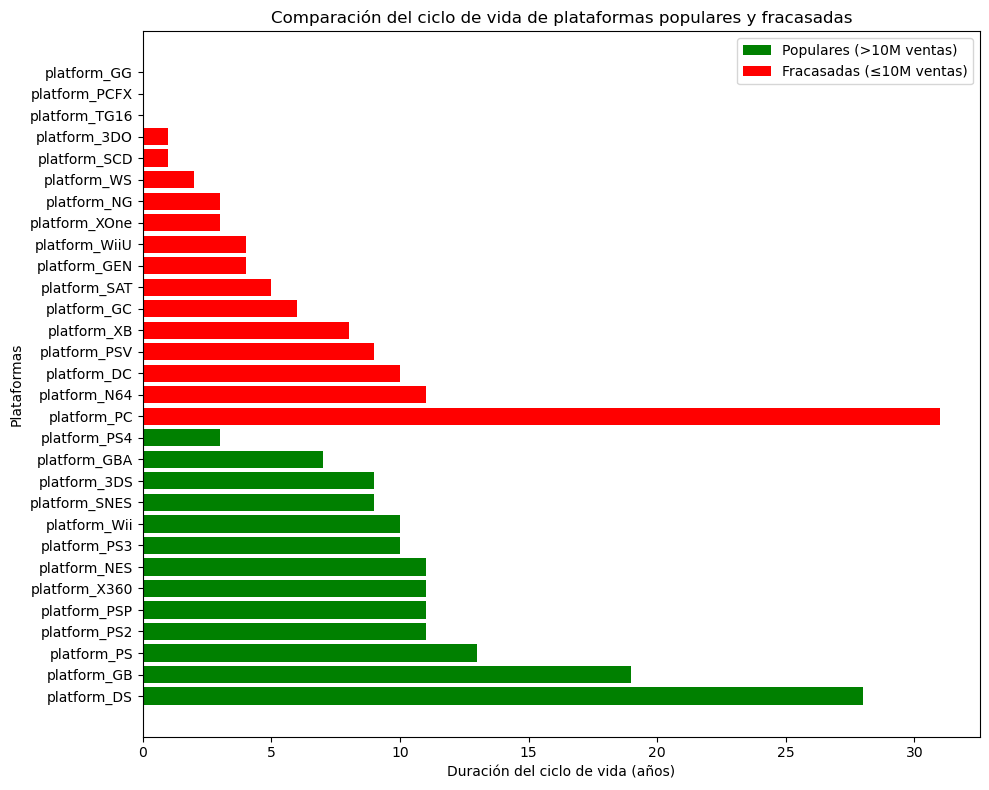

In [59]:

# Definir el umbral para considerar una plataforma "popular"
popular_threshold = 10  # 10 millones en ventas

# Dividir las plataformas en populares y fracasadas
popular_platforms = platform_lifetime_df[platform_lifetime_df['total_sales'] > popular_threshold]
failed_platforms = platform_lifetime_df[platform_lifetime_df['total_sales'] <= popular_threshold]

# Crear una figura
plt.figure(figsize=(10, 8))

# Graficar la duración del ciclo de vida de las plataformas populares y fracasadas 
plt.barh(popular_platforms.index, popular_platforms['lifetime'], color='green', label='Populares (>10M ventas)')
plt.barh(failed_platforms.index, failed_platforms['lifetime'], color='red', label='Fracasadas (≤10M ventas)')

# Añadir títulos y etiquetas
plt.title('Comparación del ciclo de vida de plataformas populares y fracasadas')
plt.xlabel('Duración del ciclo de vida (años)')
plt.ylabel('Plataformas')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Conclusión:

Las plataformas populares tienden a tener una vida útil significativamente más larga que las fracasadas. Sin embargo, algunas plataformas como PC continúan siendo relevantes por su flexibilidad, a pesar de que sus ventas físicas puedan no reflejar toda su importancia en el mercado.

°Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Determinación del período de datos adecuado:

Para construir un modelo para 2017, el período de datos más relevante debería cubrir los últimos años antes de esa fecha, para capturar las tendencias recientes en la industria y las plataformas que aún tienen relevancia.

Propuesta para el período de datos:

Tomar datos desde 2010 en adelante:

Razón: A partir de 2010, vemos el declive de plataformas más antiguas (PS2, Wii) y el surgimiento de nuevas plataformas (PS4, Xbox One). Estos años proporcionarán un buen equilibrio entre datos históricos y tendencias actuales, permitiendo capturar el comportamiento reciente de ventas y plataformas aún relevantes en 2017.
Además, las plataformas populares que permanecieron activas en ese período (PS3, Xbox 360, WiiU) ofrecerán una base sólida para construir el modelo.

In [60]:
# Filtrar los datos desde 2010 en adelante
df_recent = df[df['year_of_release'] >= 2010]

# Verificar los datos filtrados
print("Datos desde 2010 en adelante:")
print(df_recent['year_of_release'].value_counts().sort_index())


Datos desde 2010 en adelante:
year_of_release
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


1. Análisis Exploratorio de Datos (EDA): Realizar análisis exploratorio en estos datos para descubrir patrones importantes antes de construir el modelo, como la evolución de las ventas, plataformas dominantes, géneros populares, etc.

Pasos para el EDA:

Evolución de las ventas por año: Analizar cómo han cambiado las ventas de videojuegos desde 2010.

Plataformas dominantes: Identificar qué plataformas han tenido las mayores ventas en este período.

Géneros populares: Descubrir qué géneros han sido los más populares en términos de ventas desde 2010.


Paso 1: Evolución de las ventas por año


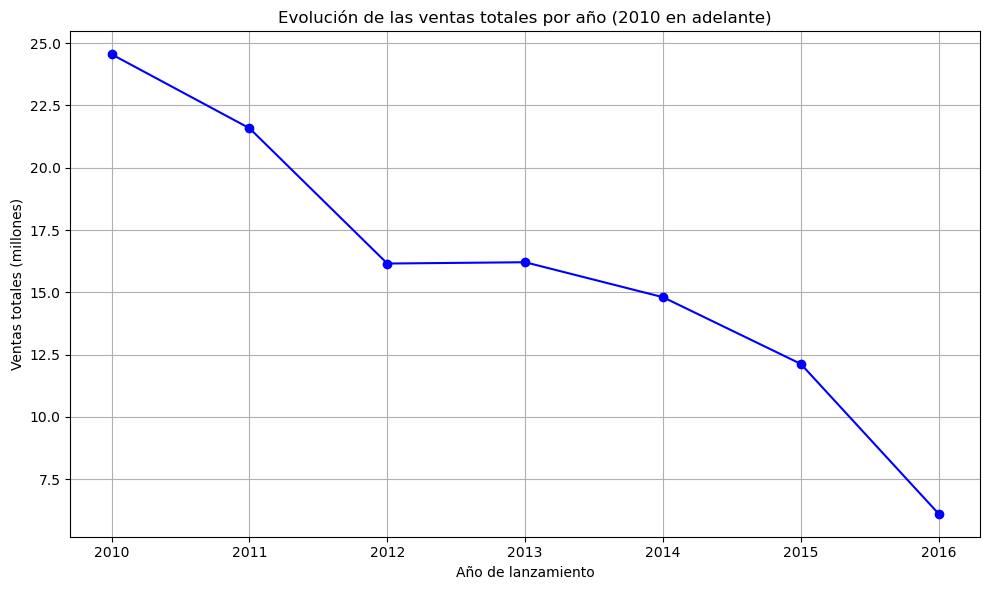

year_of_release
2010    24.550393
2011    21.584168
2012    16.154684
2013    16.206644
2014    14.804229
2015    12.126601
2016     6.114309
Name: total_sales, dtype: float64


In [61]:
# Calcular las ventas totales por año
sales_per_year = df_recent.groupby('year_of_release')['total_sales'].sum()

# Graficar la evolución de las ventas por año
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Evolución de las ventas totales por año (2010 en adelante)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar los datos
print(sales_per_year)


Paso 2: Plataformas dominantes

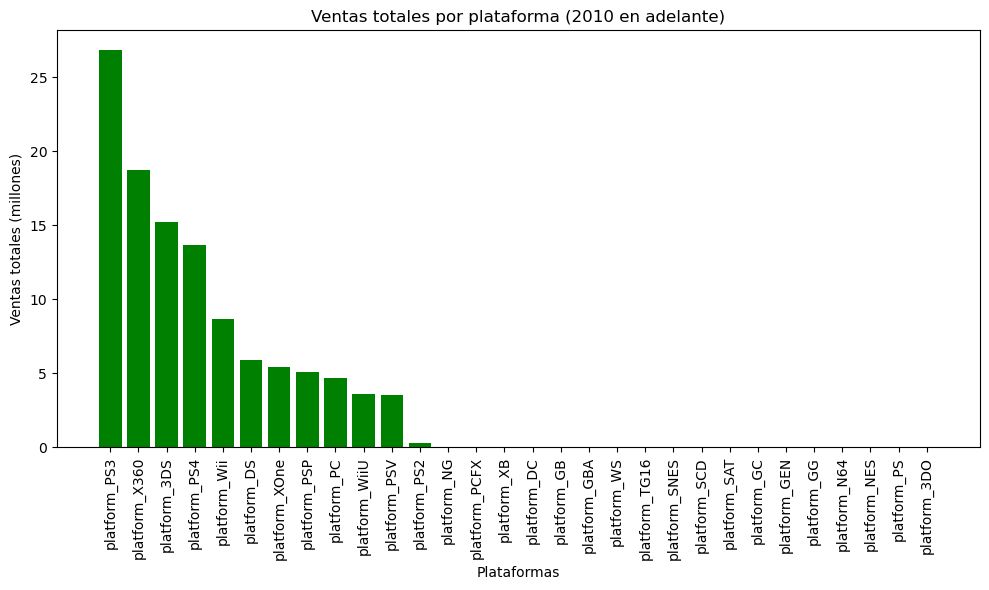

         platform  total_sales
16   platform_PS3    26.818150
27  platform_X360    18.737250
1    platform_3DS    15.214825
17   platform_PS4    13.636913
25   platform_Wii     8.656396
3     platform_DS     5.910478
29  platform_XOne     5.416189
18   platform_PSP     5.060701
12    platform_PC     4.652140
26  platform_WiiU     3.624837
19   platform_PSV     3.498123
15   platform_PS2     0.315026
11    platform_NG     0.000000
13  platform_PCFX     0.000000
28    platform_XB     0.000000
2     platform_DC     0.000000
4     platform_GB     0.000000
5    platform_GBA     0.000000
24    platform_WS     0.000000
23  platform_TG16     0.000000
22  platform_SNES     0.000000
21   platform_SCD     0.000000
20   platform_SAT     0.000000
6     platform_GC     0.000000
7    platform_GEN     0.000000
8     platform_GG     0.000000
9    platform_N64     0.000000
10   platform_NES     0.000000
14    platform_PS     0.000000
0    platform_3DO     0.000000


In [62]:
# Encontrar todas las columnas que representan plataformas (empiezan con 'platform_')
platform_columns = [col for col in df_recent.columns if col.startswith('platform_')]

# Crear un diccionario para almacenar las ventas totales por plataforma
platform_sales = {}

# Sumar las ventas por plataforma
for platform in platform_columns:
    platform_sales[platform] = (df_recent[platform] * df_recent['total_sales']).sum()

# Convertir el diccionario a un DataFrame para ordenar y visualizar
platform_sales_df = pd.DataFrame(list(platform_sales.items()), columns=['platform', 'total_sales']).sort_values(by='total_sales', ascending=False)

# Graficar las ventas totales por plataforma
plt.figure(figsize=(10, 6))
plt.bar(platform_sales_df['platform'], platform_sales_df['total_sales'], color='green')
plt.title('Ventas totales por plataforma (2010 en adelante)')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Mostrar los datos
print(platform_sales_df)


Paso 3: Géneros populares
Por último, vamos a analizar qué géneros han sido los más populares en términos de ventas desde 2010.


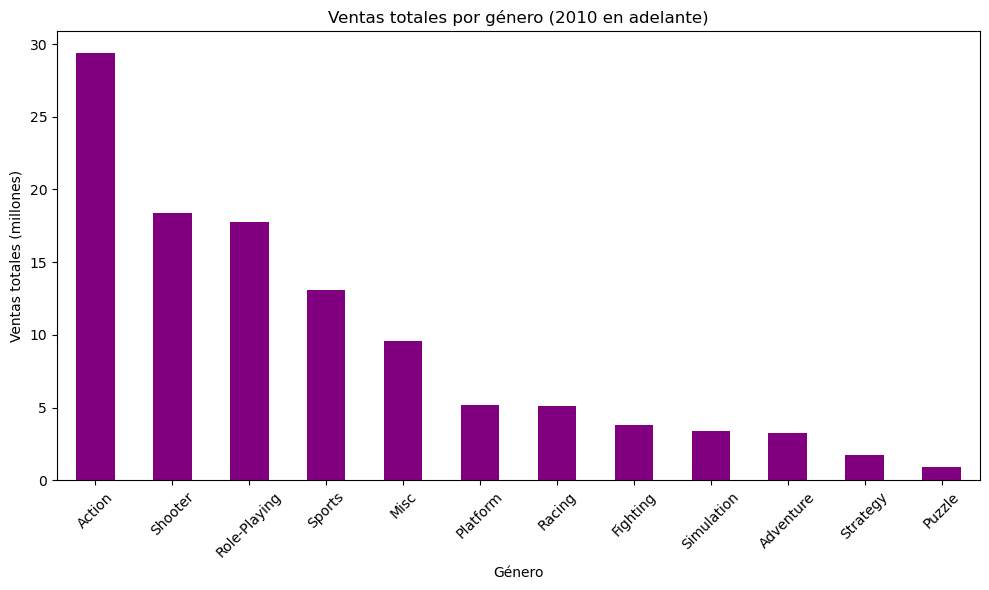

genre
Action          29.407810
Shooter         18.407356
Role-Playing    17.737053
Sports          13.054935
Misc             9.580154
Platform         5.210095
Racing           5.091360
Fighting         3.792417
Simulation       3.387107
Adventure        3.219818
Strategy         1.729209
Puzzle           0.923714
Name: total_sales, dtype: float64


In [63]:
# Calcular las ventas totales por género
genre_sales = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Graficar las ventas totales por género
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='purple')
plt.title('Ventas totales por género (2010 en adelante)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar los datos
print(genre_sales)


Conclusión:

Los géneros de acción y shooter siguen siendo los más populares y rentables desde 2010, mientras que los géneros más orientados a la lógica o la estrategia tienen una audiencia mucho más pequeña.
Esta información podría ser crucial para tomar decisiones sobre el tipo de campañas publicitarias o desarrollo de juegos que podrían tener más éxito.


2. Preprocesamiento de Datos para el Modelo: 

Si vamos a construir un modelo predictivo (por ejemplo, para predecir ventas de 2017), deberíamos asegurarnos de que los datos estén preprocesados correctamente (normalización, manejo de valores faltantes, etc.).



Pasos para el Preprocesamiento de Datos:

Manejo de valores faltantes: Identificar y manejar valores ausentes (por ejemplo, utilizando imputación o eliminándolos).

Codificación de variables categóricas: Convertir las variables categóricas en variables numéricas 

Normalización o escalado de características: Escalar las características numéricas para asegurar que todas estén en la misma escala.
División de los datos: Dividir los datos en conjuntos de entrenamiento y prueba para el modelo.


Paso 1: Manejo de valores faltantes
Primero, verificamos los valores faltantes y aplicamos alguna técnica de imputación o eliminación.

In [64]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df_recent.isnull().sum())

# Manejo de valores faltantes: Imputar con la mediana para columnas numéricas y con la moda para columnas categóricas
df_recent.loc[:, 'user_score'] = df_recent['user_score'].fillna(df_recent['user_score'].median())
df_recent.loc[:, 'critic_score'] = df_recent['critic_score'].fillna(df_recent['critic_score'].median())
df_recent.loc[:, 'rating'] = df_recent['rating'].fillna(df_recent['rating'].mode()[0])

# Verificar nuevamente para confirmar que no haya valores faltantes
print("Valores faltantes después de la imputación:")
print(df_recent.isnull().sum())


Valores faltantes por columna:
name               0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
platform_3DO       0
platform_3DS       0
platform_DC        0
platform_DS        0
platform_GB        0
platform_GBA       0
platform_GC        0
platform_GEN       0
platform_GG        0
platform_N64       0
platform_NES       0
platform_NG        0
platform_PC        0
platform_PCFX      0
platform_PS        0
platform_PS2       0
platform_PS3       0
platform_PS4       0
platform_PSP       0
platform_PSV       0
platform_SAT       0
platform_SCD       0
platform_SNES      0
platform_TG16      0
platform_WS        0
platform_Wii       0
platform_WiiU      0
platform_X360      0
platform_XB        0
platform_XOne      0
total_sales        0
dtype: int64
Valores faltantes después de la imputación:
name               0
year_of_release    0
genre    

Paso 2: 

Codificación de variables categóricas
Para las variables categóricas como plataforma, género, y rating, use One-Hot Encoding para convertirlas en variables numéricas.

In [65]:
# Verificar si las columnas 'genre' y 'rating' aún están sin codificar
print(df_recent.columns)

# Aplicar One-Hot Encoding solo a las columnas categóricas que no están codificadas
df_encoded = pd.get_dummies(df_recent, columns=['genre', 'rating'], drop_first=True)

# Verificar el DataFrame codificado
print("Primeras filas del DataFrame codificado:")
print(df_encoded.head())


Index(['name', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'rating', 'platform_3DO',
       'platform_3DS', 'platform_DC', 'platform_DS', 'platform_GB',
       'platform_GBA', 'platform_GC', 'platform_GEN', 'platform_GG',
       'platform_N64', 'platform_NES', 'platform_NG', 'platform_PC',
       'platform_PCFX', 'platform_PS', 'platform_PS2', 'platform_PS3',
       'platform_PS4', 'platform_PSP', 'platform_PSV', 'platform_SAT',
       'platform_SCD', 'platform_SNES', 'platform_TG16', 'platform_WS',
       'platform_Wii', 'platform_WiiU', 'platform_X360', 'platform_XB',
       'platform_XOne', 'total_sales'],
      dtype='object')
Primeras filas del DataFrame codificado:
                              name  year_of_release  na_sales  eu_sales  \
14              Kinect Adventures!             2010  0.362669  0.168854   
16              Grand Theft Auto V             2013  0.169729  0.313881   
23              Grand T

Paso 3: 

Normalización de características numéricas

Vamos a normalizar las columnas numéricas para asegurarnos de que todas las variables numéricas estén en la misma escala.



In [67]:
# Escalar las columnas numéricas
scaler = StandardScaler()
columns_to_scale = ['user_score', 'critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']

df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Verificar las columnas escaladas
print("Primeras filas después del escalado:")
print(df_encoded[columns_to_scale].head())


Primeras filas después del escalado:
    user_score  critic_score   na_sales   eu_sales   jp_sales  other_sales
14   -0.721313     -1.087109  24.118940  10.192028   0.802215    10.883554
16    0.968825      2.922371  11.101766  19.240904   4.060825    25.954307
23    0.879870      2.922371  15.408199  10.730651   0.009580     9.024607
27    0.346143      0.026635   8.638616   6.486298  24.625297     4.974757
29   -3.300997      1.920001  14.396840   8.791607   0.317827     8.427088


Paso 4: 

División de los datos en entrenamiento y prueba

Dividimos los datos en conjuntos de entrenamiento y prueba para preparar el entrenamiento del modelo.



In [72]:
# Definir la variable dependiente (target) y las variables independientes (features)
X = df_encoded.drop('total_sales', axis=1)  # Features
y = df_encoded['total_sales']  # Target

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (4221, 54), Conjunto de prueba: (1056, 54)


Próximo paso: 

Entrenar el modelo de regresión lineal y evaluar su rendimiento
Vamos a proceder con el entrenamiento y la evaluación del modelo, utilizando el conjunto de entrenamiento para ajustar el modelo y el conjunto de prueba para evaluar su precisión.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar la columna 'name' del conjunto de datos, ya que no es útil para el modelo
X = df_encoded.drop(['total_sales', 'name'], axis=1)  # Eliminar 'name' y 'total_sales' de las características

# Volver a dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 3.307933876058287e-32
Coeficiente de determinación (R²): 1.0


Interpretación:

R² = 1.0: El modelo tiene un ajuste perfecto con los datos, lo cual puede ser una señal de que el modelo ha capturado todas las relaciones en los datos.

MSE cercano a cero: Un MSE extremadamente bajo indica que las predicciones del modelo son casi idénticas a los valores reales.

